# Exploratory Analysis on Global Terrorism Act

## Objective

Exploring data and doing exploratory analysis using basic R

## Data Set

The data set containing information about global terrorism acts since 1970. The dataset used is named globalterrorismdb.csv[available here](http://www.start.umd.edu/gtd/), and contains over 100,000 terrorist incidents worldwide.

# Reading In the Data

In [1]:
data <- read.csv("C:/Users/i7/csv/globalterrorismdb.csv", header = TRUE, na.strings = c("", "."))
dim(data)

[1] 104689    123

Keep the relevant columns that we are going to use

In [2]:
columnsKeep <- c("iyear", "imonth", "iday", "country_txt", "region_txt", "city",
                 "attacktype1_txt", "nkill", "nwound")
data <- data[columnsKeep]

## Renaming the Columns

In [3]:
library(plyr)
data <- rename(data, c("iyear" = "year", "imonth" = "month", "iday" = "day",
                     "country_txt" = "country", "region_txt" = "region", "attacktype1_txt" = "attacktype"))

## Renaming some factor levels

In [4]:
data <- within(data, attacktype <- revalue(attacktype,
                                         c("Hostage Taking (Kidnapping)" = "Hostage (Kidnapping)",
                                           "Facility/Infrastructure Attack" = "Facility Attack",
                                           "Hostage Taking (Barricade Incident)" = "Hostage (Barricade)"
                                           )))
data <- within(data, region <- revalue(region,
                                     c("Australasia & Oceania" = "Oceania",
                                       "Central America & Caribbean" = "Central America",
                                       "Middle East & North Africa" = "Middle East"
                                       )))

# Previewing The Dataframe With Head And Tail

In [5]:
print(head(data, 5))

  year month day            country          region          city
1 1970     0   0 Dominican Republic Central America Santo Domingo
2 1970     0   0             Mexico   North America   Mexico city
3 1970     1   0        Philippines  Southeast Asia        Tarlac
4 1970     1   0             Greece  Western Europe        Athens
5 1970     1   0              Japan       East Asia       Fukouka
            attacktype nkill nwound
1        Assassination     1      0
2 Hostage (Kidnapping)     0      0
3        Assassination     1      0
4    Bombing/Explosion    NA     NA
5      Facility Attack    NA     NA


In [6]:
print(tail(data, 5))

       year month day  country      region        city        attacktype nkill
104685 2011    12  31 Pakistan  South Asia Landi Kotal Bombing/Explosion     2
104686 2011    12  31     Iraq Middle East      Kirkuk Bombing/Explosion     0
104687 2011    12  31 Pakistan  South Asia Landi Kotal Bombing/Explosion     2
104688 2011    12  31 Pakistan  South Asia        Boya Bombing/Explosion     2
104689 2011    12  31 Pakistan  South Asia Landi Kotal Bombing/Explosion     2
       nwound
104685     13
104686      1
104687      4
104688     NA
104689      4


## Replacing Missing Values

replace NA values for number of killed/wounded with 0

In [7]:
data$nkill[is.na(data$nkill)] <- 0
data$nwound[is.na(data$nwound)] <- 0

## Exploratory Analysis

In [8]:
attacktypeDamage <- ddply(data, ~attacktype, function(x){
  df <- data.frame(c("nkill", "nwound"), c(sum(x$nkill), sum(x$nwound)));
  colnames(df)<-c("stat","value");
  return(df)
})

null device 
          1

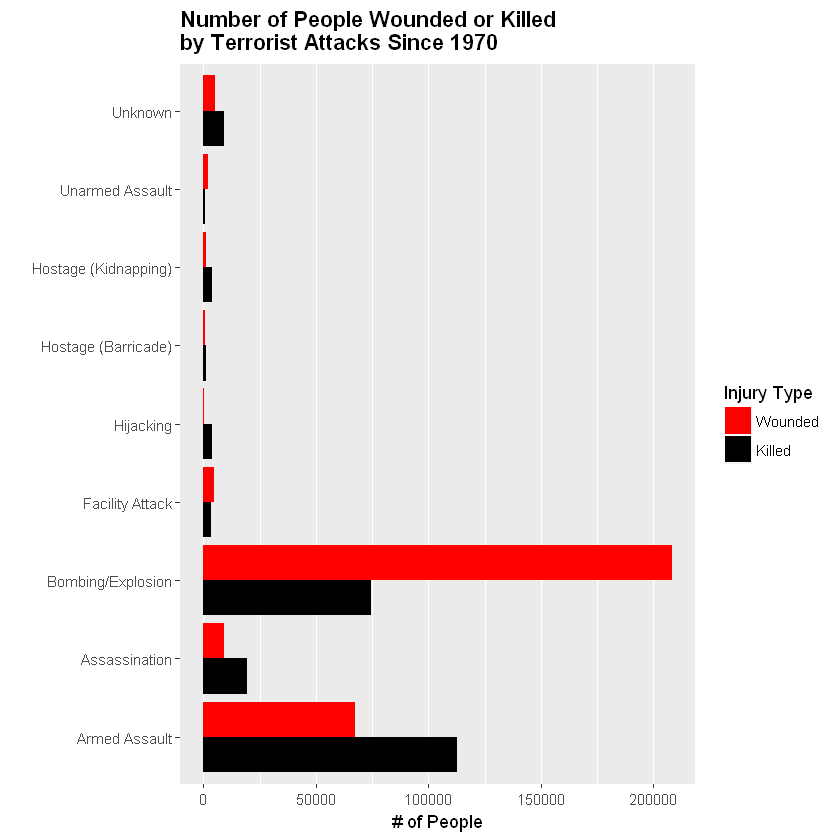

In [9]:
library(ggplot2)

ggplot(attacktypeDamage, aes(x = attacktype, y = value, fill = stat)) +
  geom_bar(stat = "identity", position = position_dodge(width=0.9)) +
  coord_flip() +
  ggtitle("Number of People Wounded or Killed\nby Terrorist Attacks Since 1970") +
  xlab("") +
  ylab("# of People") +
  scale_fill_manual(name = "Injury Type", values = c("black", "red"), labels = c('Killed', 'Wounded')) +
  guides(fill = guide_legend(reverse = TRUE)) +
  theme(panel.grid.major.y = element_blank(),
        plot.title = element_text(face="bold"))

dev.off()

#### Findings :

It is immediately visible that bombings and armed assaults are the attacks that have killed and injured
the most people.  With bombings, there are far more people getting injured than dying, while with armed
assault the fatalities are the highest.